In [2]:
import pandas as pd
import numpy as np
import json
import urllib
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [3]:
url = "https://data.cambridgema.gov/resource/xuad-73uj.json?$limit=400"
uh = urllib.request.urlopen(url)
data = uh.read().decode()
print('Retrieved', len(data), 'characters')

Retrieved 97141 characters


In [4]:
#load data to a dictionary
myData = json.loads(data)

#load myData into a DataFrame object
df = pd.DataFrame(myData)

#replace Ma with Massachusetts for every address in df['location']
df['location'] = df['location'].str.replace(', MA', ', Massachusetts')

#print the first 5 rows of df
df.head()

,file_number,date_of_report,crime_date_time,crime,reporting_area,neighborhood,location
0,2023-02647,2023-03-31T22:52:00.000,03/30/2023 16:00 - 03/31/2023 22:52,Auto Theft,506,Cambridgeport,"Lopez St & Brookline St, Cambridge, Massachusetts"
1,2023-02643,2023-03-31T20:39:00.000,03/31/2023 20:36,Aggravated Assault,1101,North Cambridge,"MASSACHUSETTS AVE & SOMERVILLE AVE, Cambridge,..."
2,2023-02640,2023-03-31T18:14:00.000,03/29/2023 20:00 - 03/31/2023 18:00,Larceny from MV,508,Cambridgeport,"500 PUTNAM AVE, Cambridge, Massachusetts"
3,2023-02634,2023-03-31T13:27:00.000,03/26/2023 17:30,Street Robbery,1002,West Cambridge,"BRATTLE ST & Church St, Cambridge, Massachusetts"
4,2023-02630,2023-03-31T10:36:00.000,03/30/2023 18:00 - 23:00,Auto Theft,901,Peabody,"GARDEN ST & MASSACHUSETTS AVE, Cambridge, Mass..."


In [5]:
locator = Nominatim(user_agent="myGeocoder", timeout=10)

#create columns for latitude and longitude
df['latitude'] = ""
df['longitude'] = ""

#loop through each row of the DataFrame and geocode the address
for index, row in df.iterrows():
    location = locator.geocode(row['location'])
    if location:
        df.at[index, 'latitude'] = location.latitude
        df.at[index, 'longitude'] = location.longitude
    else:
        df.at[index, 'latitude'] = ""
        df.at[index, 'longitude'] = ""

#drop rows with no latitude or longitude
df = df[df['latitude'] != ""]
df = df[df['longitude'] != ""]
df.head()

Bad pipe message: %s [b'.\xf8\'\xf7\x1d"vlF\x08H\xcb\x9d<f\xa2\xa5X \xf8\xcf\x0b\xd9\x04/n\xed\xb8$PQ\x11\xce\xe4\xb9\xa8\xaf\x04\xd8|<}:3\xd6Z\x0cCz\xe9\xf9\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xce8\xfc\xa1\x8a\x11vH\xd5\xcc\xf8\xb9\x06s\xc0J\xab=]\xff\\\xe9#\x18']
Bad pipe message: %s [b'\xa4)\xe2\xcf\xba\x1c\xca', b"\xb4\xaf_\xf1P\x999\xf0\x14\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009

,file_number,date_of_report,crime_date_time,crime,reporting_area,neighborhood,location,latitude,longitude
2,2023-02640,2023-03-31T18:14:00.000,03/29/2023 20:00 - 03/31/2023 18:00,Larceny from MV,508,Cambridgeport,"500 PUTNAM AVE, Cambridge, Massachusetts",42.358253,-71.109385
4,2023-02630,2023-03-31T10:36:00.000,03/30/2023 18:00 - 23:00,Auto Theft,901,Peabody,"GARDEN ST & MASSACHUSETTS AVE, Cambridge, Mass...",42.378372,-71.123878
5,2023-02614,2023-03-30T17:27:00.000,03/29/2023 14:56 - 15:40,Larceny from Residence,107,East Cambridge,"100 GORE ST, Cambridge, Massachusetts",42.371887,-71.08232
6,2023-02612,2023-03-30T17:20:00.000,03/30/2023 17:19,Commercial Robbery,1204,Highlands,"200 Alewife Brook Pky, Cambridge, Massachusetts",42.388369,-71.142954
7,2023-02618,2023-03-30T17:10:00.000,03/30/2023 13:29,Larceny from Residence,504,Cambridgeport,"0 PEARL ST, Cambridge, Massachusetts",42.364644,-71.102668


In [6]:
#convert latitude and longitude to numeric values
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

In [22]:
#convert date_of_report to numeric values
df['date_of_report'] = pd.to_numeric(df['date_of_report'])

In [23]:
df.shape
train = df.iloc[:300, :]
train.head()

,file_number,date_of_report,crime_date_time,crime,reporting_area,neighborhood,location,latitude,longitude
2,2023-02640,1680286440000000000,03/29/2023 20:00 - 03/31/2023 18:00,Larceny from MV,508,Cambridgeport,"500 PUTNAM AVE, Cambridge, Massachusetts",42.358253,-71.109385
4,2023-02630,1680258960000000000,03/30/2023 18:00 - 23:00,Auto Theft,901,Peabody,"GARDEN ST & MASSACHUSETTS AVE, Cambridge, Mass...",42.378372,-71.123878
5,2023-02614,1680197220000000000,03/29/2023 14:56 - 15:40,Larceny from Residence,107,East Cambridge,"100 GORE ST, Cambridge, Massachusetts",42.371887,-71.082320
6,2023-02612,1680196800000000000,03/30/2023 17:19,Commercial Robbery,1204,Highlands,"200 Alewife Brook Pky, Cambridge, Massachusetts",42.388369,-71.142954
7,2023-02618,1680196200000000000,03/30/2023 13:29,Larceny from Residence,504,Cambridgeport,"0 PEARL ST, Cambridge, Massachusetts",42.364644,-71.102668


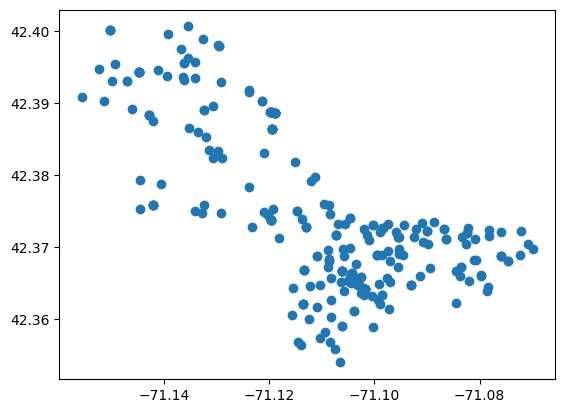

In [24]:
#investigate latitude and longitude
plt.scatter(train['longitude'], train['latitude'])

(array([ 2.,  5.,  6., 15., 59., 30., 27., 35., 28., 12.,  4.,  2.,  5.,
         9., 20.,  8.,  9., 13.,  5.,  6.]),
 array([42.3539526 , 42.35628757, 42.35862254, 42.36095751, 42.36329248,
        42.36562745, 42.36796242, 42.37029739, 42.37263236, 42.37496733,
        42.3773023 , 42.37963727, 42.38197224, 42.38430721, 42.38664218,
        42.38897715, 42.39131212, 42.39364709, 42.39598206, 42.39831703,
        42.400652  ]),
 <BarContainer object of 20 artists>)

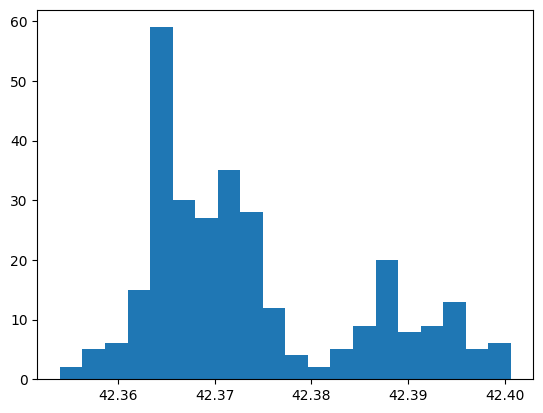

In [25]:
#plot histogram of latitude and longitude
plt.hist(train['latitude'], bins=20)

In [26]:
#select numeric columns from df
train_numeric = train.select_dtypes(include=[np.number])
train_numeric.head()

,date_of_report,latitude,longitude
2,1680286440000000000,42.358253,-71.109385
4,1680258960000000000,42.378372,-71.123878
5,1680197220000000000,42.371887,-71.082320
6,1680196800000000000,42.388369,-71.142954
7,1680196200000000000,42.364644,-71.102668


In [27]:
# define variable cols to hold the data of columns of latitude and longitude
cols = ['latitude', 'longitude']
# pick out X cols and Y = date_of_report
X = train_numeric[cols]
y = train_numeric['date_of_report']


In [34]:
# import sklearn
from sklearn import linear_model
# build a linear regression model
lr = linear_model.LinearRegression()
model = lr.fit(X, y)
predictions = model.predict(X)

In [35]:
# how well does the model fit the data?
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(y, predictions))

Mean squared error: 786604439173957101365372125184.00


In [ ]:
# the model is not good, and the amount of useful numerical information is limited